In [151]:
%matplotlib notebook
#%config InlineBackend.figure_format = 'svg'
from mpl_toolkits import mplot3d
import matplotlib as mpl
import matplotlib.pylab as plb
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi, sqrt, meshgrid, mgrid
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider, Button, interactive_output, HBox
import ipywidgets as widgets
from IPython.display import display, HTML

In [152]:
import plotly
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='sermuro', api_key='vclR61kzuVmY1TsC2z2z')

**Inicializamos algunas constantes**

In [153]:
c=299792458         # Velocidad de la luz (m/s)
mu0=4*pi/1e7        # Permeabilidad magnética del vacío (NA^-2)
eps0= 1/(c**2*mu0)  # Permitividad del vacío (F/m)
ke=c**2/1e7         # Constante de Coulomb (Nm^2/C^2)
km=1e-7             # Constante magnetica

# 1. Electrostática

## Repasemos las ecuaciones
### Empecemos por la del campo eléctrico
### $$\displaystyle\mathbf{\vec{E}}=k_e\sum_{i=1}^{N} \dfrac{q_i}{r_i^2}\mathbf{\hat{r}}$$
¿Sabéis qué es $\mathbf{\hat{r}}$?

El símbolo $\mathbf{\hat{}}$ identifica a los vectores unitarios; es decir, es un vector $\mathbf{\vec{}}$, pero con **norma** –o módulo– unidad, $\|\cdot\|=1$.

En física, se suele hablar de módulo, pero a mí me gusta hablar de norma, pues se deja ver más fácilmente su relación con los vectores. Dado que estamos en el espacio euclídeo, norma = módulo del vector.

Pero antes, veamos matemáticamente qué es un vector:

$\mathbf{\vec{r}}=\begin{pmatrix}r_x\\r_y\\r_z\end{pmatrix} ~~~$ y su transpuesta $~~~\mathbf{\vec{r}}^\top=\begin{pmatrix}r_x & r_y & r_z\end{pmatrix}.$

¿Esto qué significa? Veamos un ejemplo, pero para facilitar un poco, vayamos a un plano en $z=0$.

<IPython.core.display.Javascript object>


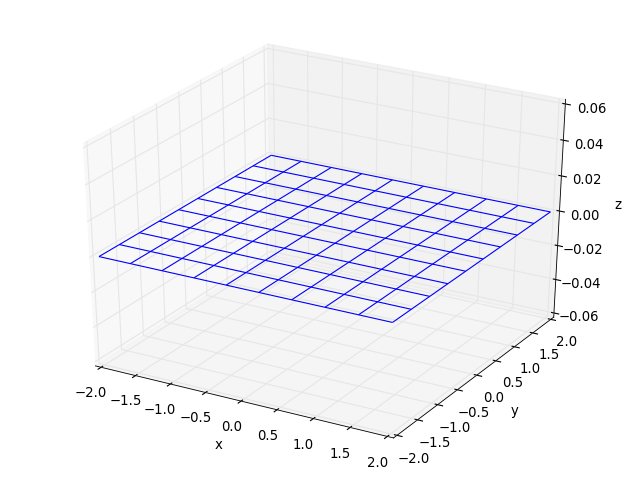

In [154]:
n=10
fig = plt.figure()
ax = plt.axes(projection='3d')
xs = np.linspace(-2, 2, n)
ys = np.linspace(-2, 2, n)
X, Y = meshgrid(xs,ys)
Z = np.zeros((n,n))
ax.plot_wireframe(X, Y, Z, rstride=1, cstride=1)
#ax.plot_surface(X, Y, Z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.tight_layout()
plt.show()

In [155]:
# Elegimos un punto sobre el que se calculará las distancias de todas las coordenadas
pos_x0,pos_y0 = np.random.randint(0,n), np.random.randint(0,n)
# Distancia
r_x, r_y = X-xs[pos_x0], Y-ys[pos_y0]

<IPython.core.display.Javascript object>


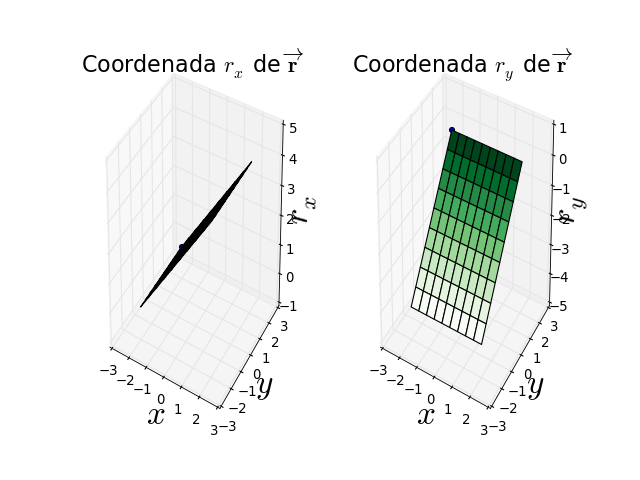

In [156]:
fig = plt.figure()
ax = fig.add_subplot(1,2,1,projection='3d')
ax.plot_surface(X, Y, r_x, rstride=1, cstride=1, cmap='Greens')
ax.scatter3D(xs[pos_x0], ys[pos_y0], 0)
ax.set_xlabel('$x$', fontsize=30)
ax.set_ylabel('$y$', fontsize=30)
ax.set_zlabel('$r_x$', fontsize=30)
ax.set_title('Coordenada $r_x$ de $\mathbf{\overrightarrow{r}}$', fontsize=20)
ax2 = fig.add_subplot(1,2,2,projection='3d')
ax2.plot_surface(X, Y, r_y, rstride=1, cstride=1, cmap='Greens')
ax2.scatter3D(xs[pos_x0], ys[pos_y0], 0)
ax2.set_xlabel('$x$', fontsize=30)
ax2.set_ylabel('$y$', fontsize=30)
ax2.set_zlabel('$r_y$', fontsize=30)
ax2.set_title('Coordenada $r_y$ de $\mathbf{\overrightarrow{r}}$', fontsize=20)
plt.show()

Una vez hemos visto las distintas coordenadas de $\mathbf{\vec{r}}$, podemos definir su **norma** (al cuadrado) como

## $$\|\mathbf{\vec{r}}\|^2=\mathbf{\vec{r}}^{\top}\mathbf{\vec{r}}=\begin{pmatrix}r_x & r_y & r_z\end{pmatrix}\begin{pmatrix}r_x\\r_y\\r_z\end{pmatrix}=r_x^2 + r_y^2 + r_z^2$$

In [157]:
r_norm=sqrt(r_x**2 + r_y**2)
minVal=1e-6
r_norm[r_norm==0.]=minVal
r_x[r_x==0.]=minVal
r_y[r_y==0.]=minVal

<IPython.core.display.Javascript object>


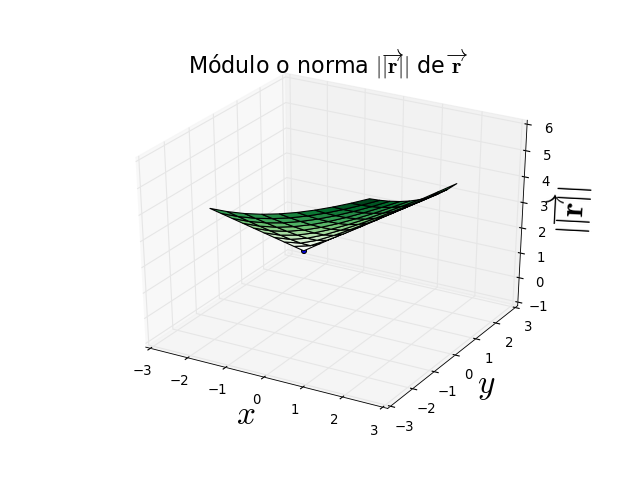

In [158]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, r_norm, rstride=1, cstride=1, cmap='Greens')
ax.scatter3D(xs[pos_x0], ys[pos_y0], 0)
ax.set_xlabel('$x$', fontsize=30)
ax.set_ylabel('$y$', fontsize=30)
ax.set_zlabel('$\||\mathbf{\overrightarrow{r}}\||$', fontsize=30)
ax.set_title(u'Módulo o norma $\||\mathbf{\overrightarrow{r}}\||$ de $\mathbf{\overrightarrow{r}}$', fontsize=20)
plt.show()

### Perfecto, ya podemos definir el vector unitario $\mathbf{\hat{r}}$:

## $$\displaystyle\mathbf{\hat{r}} = \dfrac{\mathbf{\vec{r}}}{\|\mathbf{\vec{r}}\|} = \dfrac{1}{\|\mathbf{\vec{r}}\|}\begin{pmatrix}r_x\\ r_y\end{pmatrix} = \begin{pmatrix}\frac{r_x}{\|\mathbf{\vec{r}}\|}\\ \frac{r_y}{\|\mathbf{\vec{r}}\|}\end{pmatrix}$$

In [159]:
rx_hat=np.divide(r_x,r_norm)
ry_hat=np.divide(r_y,r_norm)

<IPython.core.display.Javascript object>


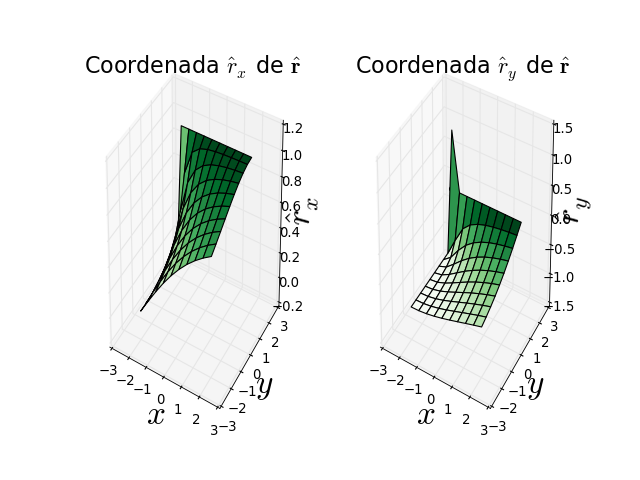

In [160]:
fig = plt.figure()
ax = fig.add_subplot(1,2,1,projection='3d')
ax.plot_surface(X, Y, rx_hat, rstride=1, cstride=1, cmap='Greens')
ax.scatter3D(xs[pos_x0], ys[pos_y0], 0)
ax.set_xlabel('$x$', fontsize=30)
ax.set_ylabel('$y$', fontsize=30)
ax.set_zlabel('$\hat{r}_x$', fontsize=30)
ax.set_title('Coordenada $\hat{r}_x$ de $\mathbf{\hat{r}}$', fontsize=20)
ax2 = fig.add_subplot(1,2,2,projection='3d')
ax2.plot_surface(X, Y, ry_hat, rstride=1, cstride=1, cmap='Greens')
ax2.scatter3D(xs[pos_x0], ys[pos_y0], 0)
ax2.set_xlabel('$x$', fontsize=30)
ax2.set_ylabel('$y$', fontsize=30)
ax2.set_zlabel('$\hat{r}_y$', fontsize=30)
ax2.set_title('Coordenada $\hat{r}_y$ de $\mathbf{\hat{r}}$', fontsize=20)
plt.show()

## ¡Genial! Volvamos al campo eléctrico...

## $$\displaystyle\mathbf{\vec{E}}=k_e\sum_{i=1}^{N} \dfrac{q_i}{r_i^2}\mathbf{\hat{r}}$$

Ahora ya resulta sencillo visualizar el campo eléctrico. :)

Un único detalle más que viene bien recordar es que $\|\mathbf{\vec{r}}\|=r_i$. Por lo tanto, podemos definir las distintas coordenadas del campo eléctrico del siguiente modo:
$$\displaystyle E_x=k_e\sum_{i=1}^{N} \dfrac{q_i}{r_i^3}r_x$$

$$\displaystyle E_y=k_e\sum_{i=1}^{N} \dfrac{q_i}{r_i^3}r_y$$

## Vayamos a por las cargas
### Para implementarlo, un poquito de programación orientado a objetos...

In [161]:
class carga:
    def __init__(self, q, posx, posy):
        self.q=q*1e-6
        self.pos=[posx,posy]

In [162]:
def E_field(cargas, X, Y):
    Ex, Ey = 0, 0
    for Q in cargas:
        r_x, r_y = X-Q.pos[0], Y-Q.pos[1]
        r = sqrt(r_x**2 + r_y**2)
        r[r==0.] = minVal
        r_x[r_x==0.] = minVal
        r_y[r_y==0.] = minVal
        Ex += ke*Q.q*np.divide(r_x,r**3)
        Ey += ke*Q.q*np.divide(r_y,r**3)
    return Ex, Ey

In [163]:
def getCargas(q, posx, posy):
    #print("%da carga creada en (%.1f,%.1f) con valor q=%.1f MC" % (len(Qs)+1,posx,posy,q))
    
    return carga(q,posx,posy) #Qs.append(carga(q,posx,posy))

## Empecemos a jugar

In [204]:
# Definamos el campo de juego
n=64                        # Nro. de puntos en cada eje del tablero (dominio del espacio vectorial)
xs = np.linspace(-2, 2, n)  # Eje x del tablero (dominio del espacio vectorial)
ys = np.linspace(-2, 2, n)  # Eje y del tablero (dominio del espacio vectorial)
X, Y = meshgrid(xs,ys)      # Se crea el tablero (se necesitan las coordenadas X e Y por separado)

In [205]:
Qs=[] # En esta lista se irán guardando las cargas creadas (cada carga es una instancia del objeto o clase carga)
qw=FloatSlider(min=-20.,max=20.,step=1.,description='carga ($\mu$C):',readout_format='.1f')
xw=FloatSlider(min=-2.,max=2.,step=.1,description=u'pos. eje x:',readout_format='.1f')
yw=FloatSlider(min=-2.,max=2.,step=.1,description=u'pos. eje y:',readout_format='.1f')
button=Button(description='Crea carga',icon='check')
ui = HBox([qw, xw, yw])
Q = interactive_output(getCargas,{'q':qw,'posx':xw,'posy':yw});
display(ui, Q)
display(button)
def creaCarga(b):
    q, posx, posy = qw.value, xw.value, yw.value
    print("%da carga creada en (%.1f,%.1f) con valor q=%.1f mmC" % (len(Qs)+1,posx,posy,qw.value))
    return Qs.append(carga(q,posx,posy))
button.on_click(creaCarga)

SEJveChjaGlsZHJlbj0oRmxvYXRTbGlkZXIodmFsdWU9MC4wLCBkZXNjcmlwdGlvbj11J2NhcmdhICgkXFxtdSRDKTonLCBtYXg9MjAuMCwgbWluPS0yMC4wLCByZWFkb3V0X2Zvcm1hdD11Jy7igKY=


Output()

Button(description=u'Crea carga', icon=u'check', style=ButtonStyle())

1a carga creada en (-1.4,0.9) con valor q=12.0 mmC
2a carga creada en (1.0,-1.2) con valor q=-5.0 mmC
3a carga creada en (-1.8,1.8) con valor q=-16.0 mmC


In [206]:
Ex, Ey = E_field(Qs, X, Y)

In [207]:
E=sqrt(Ex**2+Ey**2)
Emax=1e7; E[E>Emax]=Emax; E[E<-Emax]=-Emax; # Se acota para mejorar la visualización

<IPython.core.display.Javascript object>


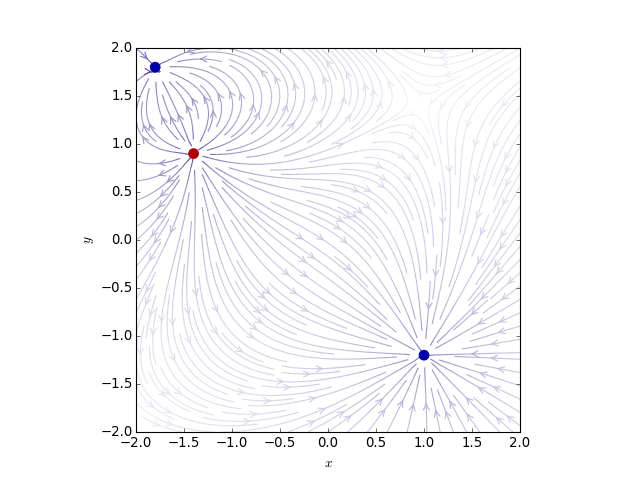

In [208]:
# Se visualizan las líneas de campo
fig = plt.figure()
ax = fig.add_subplot(111)
color = 2 * np.log(np.hypot(Ex, Ey))
ax.streamplot(xs, ys, Ex, Ey, color=color, linewidth=1, cmap=plt.cm.Purples, density=2, arrowstyle='->', arrowsize=1.5)
charge_colors = {True: '#aa0000', False: '#0000aa'}
for q in Qs:
    ax.add_artist(mpl.patches.Circle(q.pos, 0.05, color=charge_colors[q.q>0]))
ax.set_xlabel('$x$'); ax.set_ylabel('$y$')
ax.set_xlim(-2,2); ax.set_ylim(-2,2)
ax.set_aspect('equal')
plt.show()

<IPython.core.display.Javascript object>


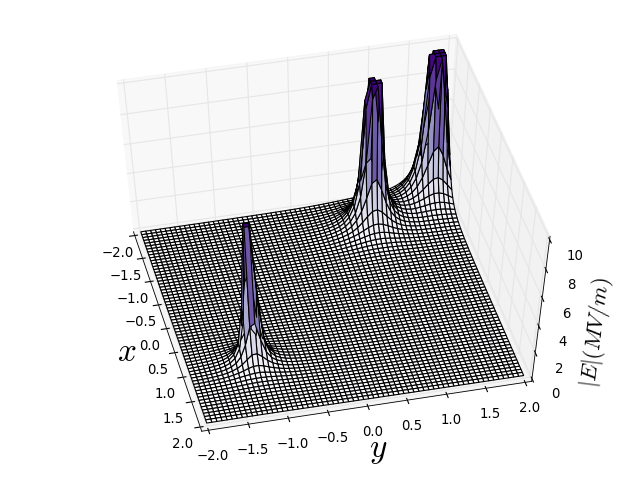

In [209]:
# Usando surface se puede ver mucho mejor la magnitud en función de la carga
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, E*1e-6, rstride=1, cstride=1, cmap='Purples')
ax.set_xlabel('$x$', fontsize=30)
ax.set_ylabel('$y$', fontsize=30)
ax.set_zlabel('$\|E\| (MV/m)$', fontsize=20)
plt.tight_layout()
plt.show()

## Por último, ¿qué me decís del Potencial?
### ¿Me sabríais decir una gran diferencia?

Eso es, es una magnitud escalar, no vectorial... por lo tanto, ya no hay que preocuparse por el vector unitario $\mathbf{\hat{r}}$... ni de ningún vector. :)

Recordemos la ecuación:
### $$\displaystyle V=k_e\sum_{i=1}^N \dfrac{q_i}{r_i}$$

In [210]:
def Potencial(cargas, X, Y):
    V = 0
    for Q in cargas:
        r_x, r_y = X-Q.pos[0], Y-Q.pos[1]
        r = sqrt(r_x**2 + r_y**2)
        r[r==0.] = minVal # Se pone un valor mínimo en los ceros para evitar problemas numéricos
        V += ke*Q.q*np.divide(1,r)
    return V

In [211]:
# Calculamos el Potencial
V = Potencial(Qs, X, Y)
Vmax=1e6; V[V>Vmax]=Vmax; V[V<-Vmax]=-Vmax # Se acotan los valores muy altos para mejorar la visualización

<IPython.core.display.Javascript object>


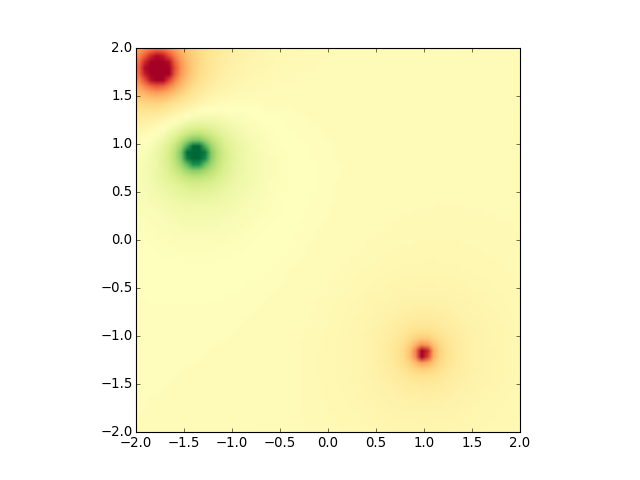

In [212]:
# Lo vemos con otro tipo de visualización... 
plt.figure()
im = plt.imshow(V, interpolation='bilinear', cmap=plt.cm.RdYlGn,
                origin='lower', extent=[-2, 2, -2, 2],
                vmax=abs(V).max(), vmin=-abs(V).max())
plt.show()

# 2. Magnetostática

*Esto me recuerda que se acerca el día de la madre...
Tengo en mente regalar el corazón de este vídeo, ¿qué me decís?:

In [219]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/voHz6sxwQ2Q?rel=0&amp;controls=0&amp;showinfo=0;start=35;end=49" frameborder="0" allowfullscreen></iframe>')

## Repasemos la ecuación del campo magnético

### $$\mathbf{\vec{B}}=\dfrac{\mu_0 I}{4\pi}\int \dfrac{d\mathbf{\vec{l}}\times \mathbf{\hat{r}}}{r^2}$$

### ¡Producto vectorial!

In [221]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/11I9szxKabU?rel=0&amp;controls=1&amp;showinfo=0;" frameborder="0" allowfullscreen></iframe>')


<IPython.core.display.Javascript object>


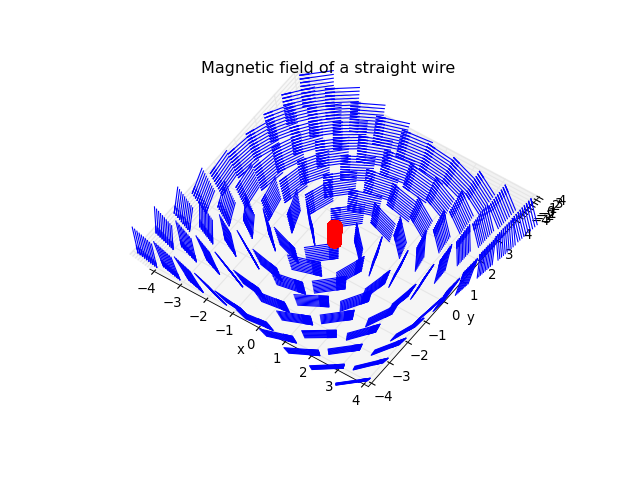

In [222]:
from mpl_toolkits.mplot3d import axes3d

x = np.linspace(-4,4,10)
y = np.linspace(-4,4,10)
z = np.linspace(-4,4,10)

x,y,z = np.meshgrid(x,y,z)

# 3d figure
fig = plt.figure()
ax = fig.gca(projection='3d')

def B(x,y,z):
    i = 1                                           #Amps in the wire
    mu = 1.26 * 10**(-6)                            #Magnetic constant                       
    mag = (mu/(2*np.pi))*(i/np.sqrt((x)**2+(y)**2)) #Magnitude of the vector B
    by = mag * (np.cos(np.arctan2(y,x)))            #By
    bx = mag * (-np.sin(np.arctan2(y,x)))           #Bx
    bz = z*0                                        #Bz (zero, using the right-hand rule)
    return bx,by,bz

def cylinder(r):
    phi = np.linspace(-2*np.pi,2*np.pi,100)
    x = r*np.cos(phi)
    y = r*np.sin(phi)
    return x,y

# Plot of the fields
bx,by,bz = B(x,y,z)                                  #Magnetic field
cx,cy = cylinder(0.2)                                #Wire

# Plot of the 3d vector field
ax.quiver(x,y,z,bx,by,bz,color='b',length=1)
                                                     #Plot the magnetic field
for i in np.linspace(-4,4,800):                      #Plot the wire
    ax.plot(cx,cy,i,label='Cylinder',color='r')

plt.title('Magnetic field of a straight wire')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# ¡Y esto ya es de Matrícula! :O

Os dejo por aquí esto que ya es de otro nivel... es de un tal Gael Varoquaux –véase la descripción que se encuentra dentro de la función– y merece bastante la pena pararse a jugar un poco con ello e identificar todo lo que está pasando con la teoría que ya os sabéis. ;)

In [223]:
run magnetic_field.py

magnetic_field.py:111: RuntimeWarning:

divide by zero encountered in divide

magnetic_field.py:111: RuntimeWarning:

invalid value encountered in divide

magnetic_field.py:118: RuntimeWarning:

invalid value encountered in divide

magnetic_field.py:120: RuntimeWarning:

divide by zero encountered in divide

magnetic_field.py:120: RuntimeWarning:

invalid value encountered in divide

magnetic_field.py:122: RuntimeWarning:

divide by zero encountered in divide

magnetic_field.py:122: RuntimeWarning:

invalid value encountered in add

magnetic_field.py:122: RuntimeWarning:

invalid value encountered in multiply

